# Model 1 - Minimum Support = 0.5 , Minimum Threshold= 0.5 , Lift value > 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!pip install mlxtend

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
df=pd.read_csv('my_movies .csv',delimiter=',')

In [5]:
df=df.fillna({'V3':'No Movie','V4':'No movie','V5':'No movie'})


In [6]:
df=df.astype(bool)

# Apriori Algorithm 

In [7]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,1.0,(V1),1
1,1.0,(V2),1
2,1.0,(V3),1
3,1.0,(V4),1
4,1.0,(V5),1
...,...,...,...
186,0.6,"(Gladiator, V4, V5, V3, Patriot, V1)",6
187,0.5,"(Gladiator, V4, V2, V5, V3, Sixth Sense)",6
188,0.6,"(Gladiator, V4, V2, V5, V3, Patriot)",6
189,0.5,"(Gladiator, V4, V2, V5, V3, Sixth Sense, V1)",7


In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),1.0,1.0,1.0,1.0,1.000000,0.00,inf,0.00
1,(V2),(V1),1.0,1.0,1.0,1.0,1.000000,0.00,inf,0.00
2,(V3),(V1),1.0,1.0,1.0,1.0,1.000000,0.00,inf,0.00
3,(V1),(V3),1.0,1.0,1.0,1.0,1.000000,0.00,inf,0.00
4,(V1),(V4),1.0,1.0,1.0,1.0,1.000000,0.00,inf,0.00
...,...,...,...,...,...,...,...,...,...,...
3257,(V2),"(Gladiator, V4, V5, V3, Patriot, V1)",1.0,0.6,0.6,0.6,1.000000,0.00,1.0,0.00
3258,(V5),"(Gladiator, V4, V2, V3, Patriot, V1)",1.0,0.6,0.6,0.6,1.000000,0.00,1.0,0.00
3259,(V3),"(Gladiator, V4, V2, V5, Patriot, V1)",1.0,0.6,0.6,0.6,1.000000,0.00,1.0,0.00
3260,(Patriot),"(Gladiator, V4, V2, V5, V3, V1)",0.6,0.7,0.6,1.0,1.428571,0.18,inf,0.75


In [9]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2706,"(Gladiator, V4, V2, V5)","(V1, Patriot)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
1859,"(Gladiator, V4)","(V1, Patriot, V5)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
742,(Gladiator),"(V1, Patriot, V4)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
2009,"(Gladiator, V4)","(V3, Patriot, V2)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
2605,"(V3, Gladiator, V1)","(Patriot, V2, V5)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
2010,"(Gladiator, V2)","(V3, Patriot, V4)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
2603,"(Gladiator, V1, V5)","(V3, Patriot, V2)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
1862,"(Gladiator, V1)","(Patriot, V4, V5)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
761,"(Gladiator, V1, V5)",(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0
2601,"(V3, Gladiator, V5)","(V1, Patriot, V2)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.0


In [10]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
50,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
51,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
52,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
53,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
162,"(Gladiator, V1)",(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
...,...,...,...,...,...,...,...,...,...,...
3250,"(Patriot, V5)","(Gladiator, V4, V2, V3, V1)",0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
3252,"(V3, Patriot)","(Gladiator, V4, V2, V5, V1)",0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
3254,"(V1, Patriot)","(Gladiator, V4, V2, V5, V3)",0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
3255,(Gladiator),"(V4, V2, V5, V3, Patriot, V1)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000


C:\Users\thila\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\thila\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\thila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


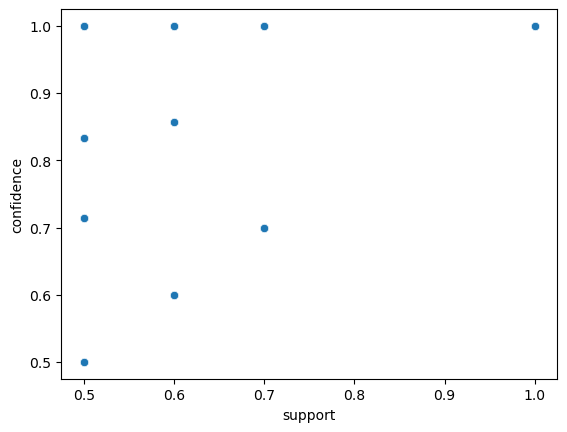

In [11]:
import seaborn as sns
sns.scatterplot('support','confidence',data=rules,legend='brief')
plt.show()

# Model 2 - Minimum Support = 0.7 , Minimum Threshold= 0.75 , Lift value > 1

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#!pip install mlxtend

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [15]:
df=pd.read_csv('my_movies .csv',delimiter=',')

In [16]:
df=df.fillna({'V3':'No Movie','V4':'No movie','V5':'No movie'})


In [17]:
df=df.astype(bool)

# Apriori Algorithm 

In [25]:
frequent_itemsets = apriori(df, min_support=0.7, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,1.0,(V1),1
1,1.0,(V2),1
2,1.0,(V3),1
3,1.0,(V4),1
4,1.0,(V5),1
...,...,...,...
58,0.7,"(Gladiator, V2, V5, V3, V1)",5
59,0.7,"(Gladiator, V4, V2, V5, V1)",5
60,0.7,"(Gladiator, V4, V5, V3, V1)",5
61,0.7,"(Gladiator, V4, V2, V5, V3)",5


In [26]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.75)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(V2),(V1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(V3),(V1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(V1),(V3),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(V1),(V4),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
597,(V4),"(Gladiator, V2, V5, V3, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
598,(V2),"(Gladiator, V4, V5, V3, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
599,(V5),"(Gladiator, V4, V2, V3, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
600,(V3),"(Gladiator, V4, V2, V5, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0


In [27]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
395,"(Gladiator, V4, V2)","(V3, V1)",0.7,1.0,0.7,1.0,1.0,0.0,inf,0.0
397,"(Gladiator, V1, V4)","(V3, V2)",0.7,1.0,0.7,1.0,1.0,0.0,inf,0.0
398,"(V3, Gladiator, V2)","(V1, V4)",0.7,1.0,0.7,1.0,1.0,0.0,inf,0.0
399,"(Gladiator, V1, V2)","(V3, V4)",0.7,1.0,0.7,1.0,1.0,0.0,inf,0.0
400,"(V3, Gladiator, V1)","(V4, V2)",0.7,1.0,0.7,1.0,1.0,0.0,inf,0.0
401,"(V3, V4, V2)","(Gladiator, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
402,"(V1, V4, V2)","(V3, Gladiator)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
403,"(V3, V1, V4)","(Gladiator, V2)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
404,"(V3, V1, V2)","(Gladiator, V4)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0


In [28]:
rules[rules.lift>=1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(V2),(V1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(V3),(V1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(V1),(V3),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(V1),(V4),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
597,(V4),"(Gladiator, V2, V5, V3, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
598,(V2),"(Gladiator, V4, V5, V3, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
599,(V5),"(Gladiator, V4, V2, V3, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0
600,(V3),"(Gladiator, V4, V2, V5, V1)",1.0,0.7,0.7,0.7,1.0,0.0,1.0,0.0


C:\Users\thila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


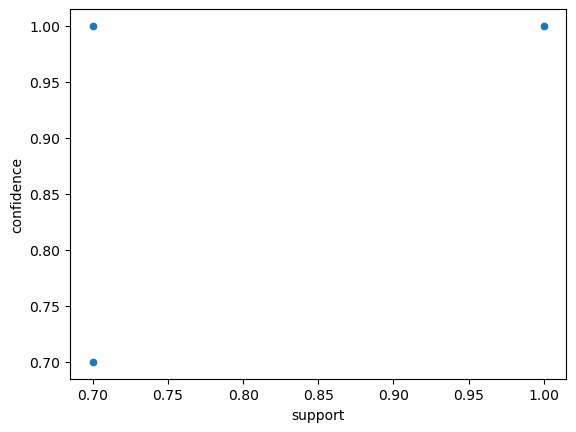

In [29]:
import seaborn as sns
sns.scatterplot('support','confidence',data=rules,legend='brief')
plt.show()

# Model 3 - Minimum Support = 0.8 , Minimum Threshold= 0.8 , Lift value > 1

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#!pip install mlxtend

In [32]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [33]:
df=pd.read_csv('my_movies .csv',delimiter=',')

In [34]:
df=df.fillna({'V3':'No Movie','V4':'No movie','V5':'No movie'})


In [35]:
df=df.astype(bool)

# Apriori Algorithm 

In [36]:
frequent_itemsets = apriori(df, min_support=0.8, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,1.0,(V1),1
1,1.0,(V2),1
2,1.0,(V3),1
3,1.0,(V4),1
4,1.0,(V5),1
5,1.0,"(V1, V2)",2
6,1.0,"(V3, V1)",2
7,1.0,"(V1, V4)",2
8,1.0,"(V1, V5)",2
9,1.0,"(V3, V2)",2


In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(V2),(V1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(V3),(V1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(V1),(V3),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(V1),(V4),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
175,(V4),"(V3, V1, V2, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
176,(V2),"(V3, V1, V4, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
177,(V5),"(V3, V1, V4, V2)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
178,(V3),"(V1, V4, V2, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0


In [38]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
113,"(V1, V2)","(V4, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
115,"(V4, V2)","(V1, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
116,"(V4, V5)","(V1, V2)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
117,"(V2, V5)","(V1, V4)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
118,(V1),"(V4, V2, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
119,(V4),"(V1, V2, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
120,(V2),"(V1, V4, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
121,(V5),"(V1, V4, V2)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
122,"(V3, V1, V4)",(V5),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0


In [39]:
rules[rules.lift>=1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(V1),(V2),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(V2),(V1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(V3),(V1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(V1),(V3),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(V1),(V4),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
175,(V4),"(V3, V1, V2, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
176,(V2),"(V3, V1, V4, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
177,(V5),"(V3, V1, V4, V2)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
178,(V3),"(V1, V4, V2, V5)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0


C:\Users\thila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


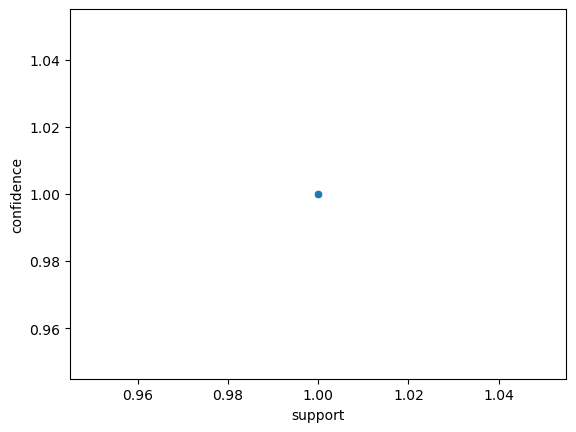

In [40]:
import seaborn as sns
sns.scatterplot('support','confidence',data=rules,legend='brief')
plt.show()

In [ ]:
As the support and threshold value increases the no of rules reduces.
lift value greater than 1 can be considered.